# Machine Learning

From Kaggle dataset : `Health Insurance Cross Sell Prediction`
> https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction/notebooks

## Import Data Sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
# Method describe to obtain a statistical summary
df.describe()

# In this dataset, we have customers with the average age 36 years old, while the oldest is 85 years old and the youngest is 20 years old.
# No customers have been protected their vehicle with insurance for one full year commitment.
# The highest anual premium for a customer paid for a vehicle insurance is 17.6 times than the average on this dataset.
# Number of Days, Customer has been associated with the company in average is 154 days. However the newest customer has been only 10 days.

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
# Method describe to obtain a summary for object data
df.describe(include = 'O')

# Most frequent for gender is Male, Vehicle Age is between 1-2 year and the customers have damaged their vehicle.
# We have more male customers than female.
# Moreover, most customers has been damaged their vehicle at least once.

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


## Checking missing values

In [6]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
       round((((df[i].isna().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = dataDesc,
            columns=[
                'Data Features',
                'Data Type',
                'Null',
                'Null Percentage',
                'Unique',
                'Unique Sample'
            ])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,id,int64,0,0.0,381109,"[378056, 123471]"
1,Gender,object,0,0.0,2,"[Male, Female]"
2,Age,int64,0,0.0,66,"[75, 42]"
3,Driving_License,int64,0,0.0,2,"[1, 0]"
4,Region_Code,float64,0,0.0,53,"[42.0, 8.0]"
5,Previously_Insured,int64,0,0.0,2,"[1, 0]"
6,Vehicle_Age,object,0,0.0,3,"[< 1 Year, 1-2 Year]"
7,Vehicle_Damage,object,0,0.0,2,"[No, Yes]"
8,Annual_Premium,float64,0,0.0,48838,"[33995.0, 32165.0]"
9,Policy_Sales_Channel,float64,0,0.0,155,"[13.0, 154.0]"


In [7]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

We have `no missing value`.

In [8]:
num_var = df._get_numeric_data().columns
cat_var= list(set(df.columns) - set(num_var))
print(num_var)
print('===')
print(cat_var)

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')
===
['Vehicle_Age', 'Vehicle_Damage', 'Gender']


In [9]:
df.drop(columns = 'id', inplace = True)
df.head(3)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


## Encoding

In [10]:
## Encoding Age

df['Gender'] = df['Gender'].map({'Male' : 0, 
                                 'Female' : 1})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [11]:
# Encoding Vehicle Damage

df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'No' : 0, 
                                                 'Yes' : 1})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [12]:
# Encoding Vehicle Age

df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year' : 0, 
                                           '1-2 Year' : 1,  
                                           '> 2 Years' : 2})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [13]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
       round((((df[i].isna().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = dataDesc,
            columns=[
                'Data Features',
                'Data Type',
                'Null',
                'Null Percentage',
                'Unique',
                'Unique Sample'
            ])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,Gender,int64,0,0.0,2,"[0, 1]"
1,Age,int64,0,0.0,66,"[80, 67]"
2,Driving_License,int64,0,0.0,2,"[0, 1]"
3,Region_Code,float64,0,0.0,53,"[37.0, 29.0]"
4,Previously_Insured,int64,0,0.0,2,"[0, 1]"
5,Vehicle_Age,int64,0,0.0,3,"[0, 1]"
6,Vehicle_Damage,int64,0,0.0,2,"[0, 1]"
7,Annual_Premium,float64,0,0.0,48838,"[43435.0, 30330.0]"
8,Policy_Sales_Channel,float64,0,0.0,155,"[6.0, 145.0]"
9,Vintage,int64,0,0.0,290,"[129, 217]"


## Mini EDA

### Null Hypothesis :

- `Gender` is corelated with `Response`
- `Age` is correlated with `Response`
- `Driving License` is correlated with `Response`
- `Previosly_Insured` correlated with `Response`
- `Vehicle_Age` is correlated with `Response`
- `Vehicle Damage` is correlated with `Response`
- `Anuual_Premium` is correlated with `Response`
- `Vintage` is correlated with `Response`

### Gender

In [14]:
df['Gender'].value_counts()

0    206089
1    175020
Name: Gender, dtype: int64

In [15]:
pd.crosstab(index = df['Gender'], columns = df['Response'])

Response,0,1
Gender,,
0,177564,28525
1,156835,18185


### Age

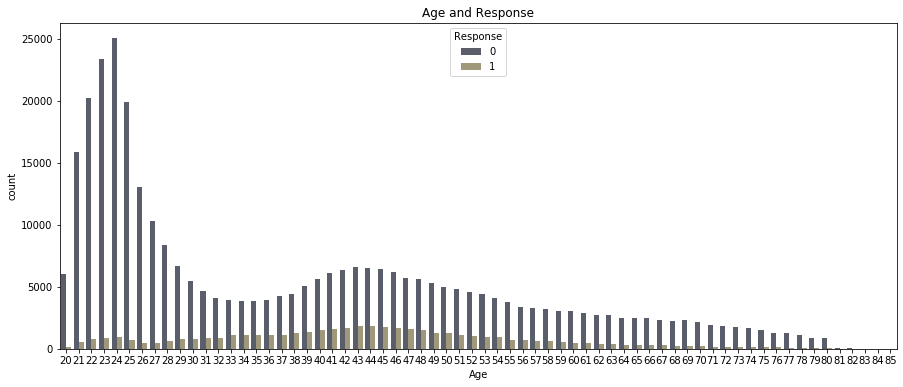

In [16]:
plt.figure(figsize = (15, 6))
sns.countplot(df['Age'], hue=df['Response'], palette = 'cividis')
plt.title('Age and Response')
plt.show()

### Driving License

In [17]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [18]:
pd.crosstab(index = df['Driving_License'], columns = df['Response'])

Response,0,1
Driving_License,,
0,771,41
1,333628,46669


### Previously Insured

In [19]:

df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [20]:
pd.crosstab(index = df['Previously_Insured'], columns = df['Response'])

Response,0,1
Previously_Insured,,
0,159929,46552
1,174470,158


### Vehicle Age

- '< 1 Year' : 0, 
- '1-2 Year' : 1,  
- '> 2 Years': 2

In [21]:
df['Vehicle_Age'].value_counts()

1    200316
0    164786
2     16007
Name: Vehicle_Age, dtype: int64

In [22]:
pd.crosstab(index = df['Vehicle_Age'], columns = df['Response'])

Response,0,1
Vehicle_Age,,
0,157584,7202
1,165510,34806
2,11305,4702


### Vehicle Damage

- 'No' : 0, 
- 'Yes' : 1

In [23]:
df['Vehicle_Damage'].value_counts()

1    192413
0    188696
Name: Vehicle_Damage, dtype: int64

In [24]:
pd.crosstab(index = df['Vehicle_Damage'], columns = df['Response'])

Response,0,1
Vehicle_Damage,,
0,187714,982
1,146685,45728


### Annual_Premium

In [25]:
df['Annual_Premium'].value_counts()

2630.0     64877
69856.0      140
39008.0       41
38287.0       38
45179.0       38
           ...  
62326.0        1
59733.0        1
55934.0        1
75387.0        1
53346.0        1
Name: Annual_Premium, Length: 48838, dtype: int64

In [26]:
pd.crosstab(index = df['Annual_Premium'], columns = df['Response'])

Response,0,1
Annual_Premium,,
2630.0,56372,8505
6098.0,1,0
7670.0,1,0
8739.0,1,0
9792.0,1,0
...,...,...
472042.0,1,2
489663.0,0,1
495106.0,1,0


### Vintage

In [27]:
df['Vintage'].value_counts()

256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64

In [28]:
pd.crosstab(index = df['Vintage'], columns = df['Response'])

Response,0,1
Vintage,,
10,1164,147
11,1153,191
12,1092,165
13,1145,184
14,1104,156
...,...,...
295,1118,157
296,1146,156
297,1142,142


## Correlation

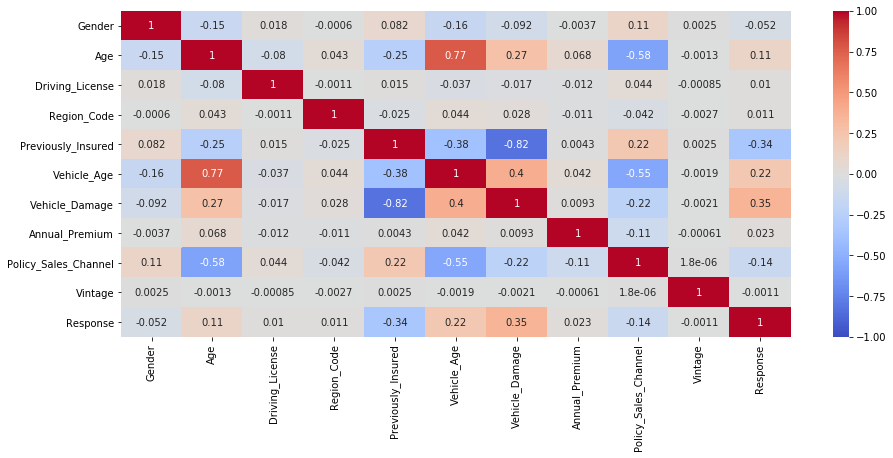

In [29]:
plt.figure(figsize = (15, 6))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [30]:
df.corr()['Response'].sort_values(ascending = True)

Previously_Insured     -0.341170
Policy_Sales_Channel   -0.139042
Gender                 -0.052440
Vintage                -0.001050
Driving_License         0.010155
Region_Code             0.010570
Annual_Premium          0.022575
Age                     0.111147
Vehicle_Age             0.221874
Vehicle_Damage          0.354400
Response                1.000000
Name: Response, dtype: float64

## Feature Engineering and Feature Selection

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Policy_Sales_Channel', 'Gender', 'Vintage', 'Driving_License', 'Region_Code', 'Response'])
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=.80, random_state=42)

In [32]:
X_train.shape

(304887, 5)

In [33]:
X_test.shape

(76222, 5)

### SMOTE (Imbalance Data)

In [34]:
import imblearn
from imblearn.over_sampling import SMOTE

In [35]:
sm = SMOTE(random_state = 42)

In [36]:
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [37]:
df_sm = pd.concat([X_train_sm, y_train_sm], axis = 1)

In [38]:
df_sm['Response'].value_counts()

1    267519
0    267519
Name: Response, dtype: int64

## Classification Algorithms
- Logistic Regression
- K-Nearest Neighbour Classifier
- Decision Tree Classifier
- 

## Logistic Regression (Classification Algorithms)

In [39]:
from sklearn.linear_model import LogisticRegression

model_sm = LogisticRegression()
model_sm.fit(X_train_sm, y_train_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred_sm_logreg = model_sm.predict(X_test)

In [41]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

acc_logreg = accuracy_score(y_test, y_pred_sm_logreg)
recall_logreg = recall_score(y_test, y_pred_sm_logreg)
prec_logreg = precision_score(y_test, y_pred_sm_logreg)
f1score_logreg = f1_score(y_test, y_pred_sm_logreg)

print(classification_report(y_test, y_pred_sm_logreg))

              precision    recall  f1-score   support

           0       0.93      0.33      0.49     66880
           1       0.15      0.83      0.25      9342

    accuracy                           0.39     76222
   macro avg       0.54      0.58      0.37     76222
weighted avg       0.84      0.39      0.46     76222



In [42]:
confusionmatrix_sm_logreg = confusion_matrix(y_test, y_pred_sm_logreg, labels = [1,0])

In [43]:
df_sm_logreg = pd.DataFrame(data = confusionmatrix_sm_logreg, 
                            index = ["Aktual 1", "Aktual 0"], 
                            columns = ["Prediksi 1", "Prediksi 0"])
df_sm_logreg

,Prediksi 1,Prediksi 0
Aktual 1,7748,1594
Aktual 0,44527,22353


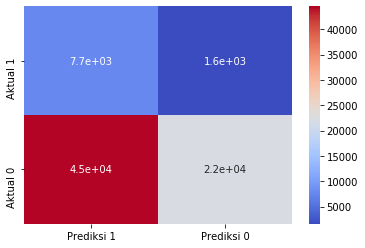

In [44]:
sns.heatmap(df_sm_logreg, annot = True, cmap= 'coolwarm')

## K-Nearest Neighbors Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

model_sm_KNN = KNeighborsClassifier()
model_sm_KNN.fit(X_train_sm, y_train_sm)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
y_pred_sm_KNN = model_sm_KNN.predict(X_test)

In [47]:
acc_KNN = accuracy_score(y_test, y_pred_sm_KNN)
recall_KNN = recall_score(y_test, y_pred_sm_KNN)
prec_KNN = precision_score(y_test, y_pred_sm_KNN)
f1score_KNN = f1_score(y_test, y_pred_sm_KNN)

print(classification_report(y_test, y_pred_sm_KNN))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81     66880
           1       0.20      0.48      0.28      9342

    accuracy                           0.70     76222
   macro avg       0.56      0.61      0.55     76222
weighted avg       0.82      0.70      0.75     76222



a higher F1-score as “proof” that their model is better than a model with a lower score.

In [48]:
confusionmatrix_sm_KNN = confusion_matrix(y_test, y_pred_sm_KNN, labels = [1,0])

In [49]:
df_sm_KNN = pd.DataFrame(data = confusionmatrix_sm_KNN, 
                            index = ["Aktual 1", "Aktual 0"], 
                            columns = ["Prediksi 1", "Prediksi 0"])
df_sm_KNN

# KNN has  `FN` = 5174
# KNN model has more `FN` = Not the best model

,Prediksi 1,Prediksi 0
Aktual 1,4471,4871
Aktual 0,17804,49076


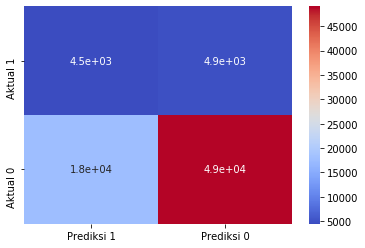

In [50]:
sns.heatmap(df_sm_KNN, annot = True, cmap= 'coolwarm')

## Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
model_sm_DecTree = DecisionTreeClassifier()
model_sm_DecTree.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
y_pred_sm_DecTree = model_sm_DecTree.predict(X_test)

In [54]:
acc_DecTree = accuracy_score(y_test, y_pred_sm_DecTree)
recall_DecTree = recall_score(y_test, y_pred_sm_DecTree)
prec_DecTree = precision_score(y_test, y_pred_sm_DecTree)
f1score_DecTree = f1_score(y_test, y_pred_sm_DecTree)

print(classification_report(y_test, y_pred_sm_DecTree))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     66880
           1       0.27      0.57      0.36      9342

    accuracy                           0.76     76222
   macro avg       0.60      0.68      0.61     76222
weighted avg       0.85      0.76      0.79     76222



In [55]:
confusionmatrix_sm_DecTree = confusion_matrix(y_test, y_pred_sm_DecTree, labels = [1,0])

In [56]:
df_sm_DecTree = pd.DataFrame(data = confusionmatrix_sm_DecTree, 
                            index = ["Aktual 1", "Aktual 0"], 
                            columns = ["Prediksi 1", "Prediksi 0"])
df_sm_DecTree

,Prediksi 1,Prediksi 0
Aktual 1,5303,4039
Aktual 0,14475,52405


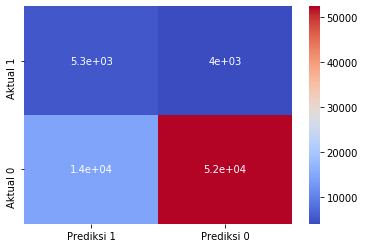

In [57]:
sns.heatmap(df_sm_DecTree, annot = True, cmap= 'coolwarm')

In [58]:
result = {
    "LogisticReg": [acc_logreg, recall_logreg, prec_logreg, f1score_logreg],
    "KNN": [acc_KNN, recall_KNN, prec_KNN, f1score_KNN],
    "DecisionTree": [acc_DecTree, recall_DecTree, prec_DecTree, f1score_DecTree]
    }

pd.DataFrame(data = result, index = ['Accuracy', 'Recall', 'Precision', 'F1 Score']).T

,Accuracy,Recall,Precision,F1 Score
LogisticReg,0.394912,0.829373,0.148216,0.251489
KNN,0.702514,0.478591,0.200718,0.282823
DecisionTree,0.757104,0.567651,0.268126,0.364217
